# **Introduction**

**In this project, we will,**
* **Investigate the online retail dataset and do data cleaning**
* **Will find the most and least expensive products**
* **Overlook at the sales numbers, using different features like countries, products, customers**
* **Performing Cohort analysis for retention rate and for average sales quantity**
* **Visualizing how sales amount change with time**
* **Taking a new online retail dataset and I again did clean and processed the data**
* **Used FP-Algorithm to get frequent patterns from a portion of huge numbers of invoices in the dataset**
* **Using mlxtend library's association_rules module to get the confidence metric, so I can sort them on that basis**

# **Importing Basic Dependencies**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # processing dates
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting
import warnings
warnings.filterwarnings("ignore")

In [2]:
retail = pd.read_csv('../input/onlineretail/online_retail.csv')

# **Checking and Preparing the Data**

In [3]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [4]:
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04-12-2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04-12-2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04-12-2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04-12-2011 13:15,2.89,16931.0,United Kingdom
1048574,580502,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,04-12-2011 13:15,6.65,16931.0,United Kingdom


In [5]:
retail.shape

(1048575, 8)

In [6]:
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [7]:
retail.duplicated().sum()

34150

In [8]:
retail = retail.drop_duplicates()

In [9]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description      4265
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228826
Country             0
dtype: int64

In [10]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014425 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1014425 non-null  object 
 1   StockCode    1014425 non-null  object 
 2   Description  1010160 non-null  object 
 3   Quantity     1014425 non-null  int64  
 4   InvoiceDate  1014425 non-null  object 
 5   Price        1014425 non-null  float64
 6   Customer ID  785599 non-null   float64
 7   Country      1014425 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 69.7+ MB


In [11]:
retail.describe()

,Quantity,Price,Customer ID
count,1.014425e+06,1.014425e+06,785599.000000
mean,1.009725e+01,4.590115e+00,15313.078667
std,1.352799e+02,1.215813e+02,1695.992802
min,-7.421500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13963.000000
50%,3.000000e+00,2.100000e+00,15235.000000
75%,1.000000e+01,4.150000e+00,16788.000000
max,7.421500e+04,3.897000e+04,18287.000000


In [12]:
retail['InvoiceDate_DT'] = pd.to_datetime(retail['InvoiceDate'])
retail = retail[retail['Customer ID'].notna()]

In [13]:
retail.shape

(785599, 9)

In [14]:
retail['Customer ID'] = retail['Customer ID'].astype(np.int64)
retail = retail.sort_values('InvoiceDate_DT')
retail['Total'] = retail['Quantity'] * retail['Price']

In [15]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085,United Kingdom,2009-01-12 07:45:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,2009-01-12 07:45:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,2009-01-12 07:45:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085,United Kingdom,2009-01-12 07:45:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085,United Kingdom,2009-01-12 07:45:00,30.00
...,...,...,...,...,...,...,...,...,...,...
920141,570876,23394,POSTE FRANCE CUSHION COVER,1,12-10-2011 17:19,3.75,16085,United Kingdom,2011-12-10 17:19:00,3.75
920140,570876,46000M,POLYESTER FILLER PAD 45x45cm,1,12-10-2011 17:19,1.55,16085,United Kingdom,2011-12-10 17:19:00,1.55
920139,570876,46000S,POLYESTER FILLER PAD 40x40cm,1,12-10-2011 17:19,1.45,16085,United Kingdom,2011-12-10 17:19:00,1.45
920149,570876,22470,HEART OF WICKER LARGE,3,12-10-2011 17:19,2.95,16085,United Kingdom,2011-12-10 17:19:00,8.85


In [16]:
df = pd.DataFrame(retail)

In [17]:
df.to_csv("online_retail_clean.csv")

# **General Sales Analytics**

### **Most and Least Expensive Product**

In [18]:
least_expensive = retail.loc[retail['Price'] == retail['Price'].min()] 

In [19]:
least_expensive

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
4674,489825,22076,6 RIBBONS EMPIRE,12,02-12-2009 13:34,0.0,16126,United Kingdom,2009-02-12 13:34:00,0.0
6781,489998,48185,DOOR MAT FAIRY CAKE,2,03-12-2009 11:19,0.0,15658,United Kingdom,2009-03-12 11:19:00,0.0
16107,490727,M,Manual,1,07-12-2009 16:38,0.0,17231,United Kingdom,2009-07-12 16:38:00,0.0
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,08-12-2009 15:25,0.0,14108,United Kingdom,2009-08-12 15:25:00,0.0
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,08-12-2009 15:25,0.0,14108,United Kingdom,2009-08-12 15:25:00,0.0
...,...,...,...,...,...,...,...,...,...,...
1005014,577168,M,Manual,1,18-11-2011 10:42,0.0,12603,Germany,2011-11-18 10:42:00,0.0
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,18-11-2011 13:23,0.0,12444,Norway,2011-11-18 13:23:00,0.0
1011446,577696,M,Manual,1,21-11-2011 11:57,0.0,16406,United Kingdom,2011-11-21 11:57:00,0.0
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,25-11-2011 15:57,0.0,13256,United Kingdom,2011-11-25 15:57:00,0.0


In [20]:
least_expensive = least_expensive.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')
least_expensive 

,Description,Price,Quantity
0,FLAMINGO LIGHTS,0.0,24
1,OVAL WALL MIRROR DIAMANTE,0.0,1
2,36 FOIL STAR CAKE CASES,0.0,144
3,6 RIBBONS EMPIRE,0.0,12
4,ADVENT CALENDAR GINGHAM SACK,0.0,4
...,...,...,...
56,SET/5 RED SPOTTY LID GLASS BOWLS,0.0,2
57,TV DINNER TRAY DOLLY GIRL,0.0,9
58,This is a test product.,0.0,10
59,VINTAGE CREAM CAT FOOD CONTAINER,0.0,1


In [21]:
most_expensive = retail.loc[retail['Price'] == retail['Price'].max()]
most_expensive 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
748142,C556445,M,Manual,-1,10-06-2011 15:31,38970.0,15098,United Kingdom,2011-10-06 15:31:00,-38970.0


**We can see that the most expensive product in the dataset has a weird 
description 'Manual' and is priced at £38970.0. It is interesting that 
the quantity is -1; looks like someone returned an item priced that high 
or did not pay for it yet.**

**Finding the least expensive product needs one extra step, because we have 
61 unique descriptions of products priced at £0.0. Now, what if we disregard 
zero-priced products in order to get more meaningful insights?**

In [22]:
retail_no_returns = retail.loc[retail['Quantity'] > 0]
retail_no_returns

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085,United Kingdom,2009-01-12 07:45:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,2009-01-12 07:45:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,2009-01-12 07:45:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085,United Kingdom,2009-01-12 07:45:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085,United Kingdom,2009-01-12 07:45:00,30.00
...,...,...,...,...,...,...,...,...,...,...
920141,570876,23394,POSTE FRANCE CUSHION COVER,1,12-10-2011 17:19,3.75,16085,United Kingdom,2011-12-10 17:19:00,3.75
920140,570876,46000M,POLYESTER FILLER PAD 45x45cm,1,12-10-2011 17:19,1.55,16085,United Kingdom,2011-12-10 17:19:00,1.55
920139,570876,46000S,POLYESTER FILLER PAD 40x40cm,1,12-10-2011 17:19,1.45,16085,United Kingdom,2011-12-10 17:19:00,1.45
920149,570876,22470,HEART OF WICKER LARGE,3,12-10-2011 17:19,2.95,16085,United Kingdom,2011-12-10 17:19:00,8.85


In [23]:
most_expensive_no_returns = retail_no_returns.loc[retail_no_returns['Price'] == retail_no_returns['Price'].max()] 
most_expensive_no_returns

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
135013,502263,M,Manual,1,23-03-2010 15:22,10953.5,12918,United Kingdom,2010-03-23 15:22:00,10953.5


In [24]:
most_expensive_no_returns = most_expensive_no_returns.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')
most_expensive_no_returns

,Description,Price,Quantity
0,Manual,10953.5,1


In [25]:
retail_non_zero_price = retail.loc[retail['Price'] != 0]

In [26]:
retail_non_zero_price

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085,United Kingdom,2009-01-12 07:45:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,2009-01-12 07:45:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,2009-01-12 07:45:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085,United Kingdom,2009-01-12 07:45:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085,United Kingdom,2009-01-12 07:45:00,30.00
...,...,...,...,...,...,...,...,...,...,...
920141,570876,23394,POSTE FRANCE CUSHION COVER,1,12-10-2011 17:19,3.75,16085,United Kingdom,2011-12-10 17:19:00,3.75
920140,570876,46000M,POLYESTER FILLER PAD 45x45cm,1,12-10-2011 17:19,1.55,16085,United Kingdom,2011-12-10 17:19:00,1.55
920139,570876,46000S,POLYESTER FILLER PAD 40x40cm,1,12-10-2011 17:19,1.45,16085,United Kingdom,2011-12-10 17:19:00,1.45
920149,570876,22470,HEART OF WICKER LARGE,3,12-10-2011 17:19,2.95,16085,United Kingdom,2011-12-10 17:19:00,8.85


In [27]:
least_expensive_not_null = retail_non_zero_price.loc[retail_non_zero_price['Price'] == retail_non_zero_price['Price'].min()]

In [28]:
least_expensive_not_null

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,01-02-2010 15:38,0.001,17350,United Kingdom,2010-01-02 15:38:00,0.001
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,19-01-2010 17:04,0.001,16705,United Kingdom,2010-01-19 17:04:00,0.001
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,29-01-2010 13:53,0.001,13583,United Kingdom,2010-01-29 13:53:00,0.001
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,15-02-2010 10:47,0.001,13408,United Kingdom,2010-02-15 10:47:00,0.001
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,21-02-2010 12:03,0.001,15182,United Kingdom,2010-02-21 12:03:00,0.001
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,24-02-2010 13:46,0.001,13765,United Kingdom,2010-02-24 13:46:00,0.001
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,26-02-2010 13:26,0.001,14459,United Kingdom,2010-02-26 13:26:00,0.001
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,03-02-2010 11:58,0.001,13408,United Kingdom,2010-03-02 11:58:00,0.001
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,15-03-2010 11:00,0.001,14857,United Kingdom,2010-03-15 11:00:00,0.001
178629,506303,PADS,PADS TO MATCH ALL CUSHIONS,1,29-04-2010 10:43,0.001,14249,United Kingdom,2010-04-29 10:43:00,0.001


In [29]:
least_expensive_not_null = least_expensive_not_null.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')
least_expensive_not_null

,Description,Price,Quantity
0,Bank Charges,0.001,1
1,PADS TO MATCH ALL CUSHIONS,0.001,17


**So, the cheapest product is 'PADS TO MATCH ALL CUSHIONS'. 
It is priced at £0.001 only (so basically you get 100 of such pads for 1 penny!
Also, bank charges also are priced at £0.001.**

**Customers Analysis: Total Purchase Amount
Next, We are interested in finding out, which 10 customers have spent most in the 
online shop for the two years, and thus are the most valuable clients. Also, I'll define the 10 customers spending least.**

In [30]:
retail_customers = retail.groupby(['Customer ID', 'Country'], as_index=False)['Total'].agg('sum')

In [31]:
retail_customers

,Customer ID,Country,Total
0,12346,United Kingdom,-51.74
1,12347,Iceland,4696.71
2,12348,Finland,2019.40
3,12349,Italy,4404.54
4,12350,Norway,334.40
...,...,...,...
5932,18283,United Kingdom,2456.90
5933,18284,United Kingdom,436.68
5934,18285,United Kingdom,427.00
5935,18286,United Kingdom,1188.43


In [32]:
retail_customers_asc = retail_customers.sort_values('Total').head(10)
retail_customers_desc = retail_customers.sort_values('Total', ascending=False).head(10)

In [33]:
retail_customers_asc 

,Customer ID,Country,Total
5051,17399,United Kingdom,-25111.09
580,12918,United Kingdom,-10953.50
3504,15849,United Kingdom,-5876.34
3415,15760,Norway,-5795.87
4633,16981,United Kingdom,-4620.86
3805,16151,United Kingdom,-4217.59
1722,14063,United Kingdom,-3767.20
5672,18023,United Kingdom,-3248.86
4665,17013,United Kingdom,-3224.76
2859,15202,United Kingdom,-2570.18


In [34]:
retail_customers_desc

,Customer ID,Country,Total
5751,18102,United Kingdom,558895.07
2304,14646,Netherlands,511614.05
1815,14156,EIRE,296063.44
2569,14911,EIRE,259455.94
5102,17450,United Kingdom,231390.55
1354,13694,United Kingdom,186889.68
5163,17511,United Kingdom,161112.30
71,12415,Australia,143269.29
4336,16684,United Kingdom,136100.27
2719,15061,United Kingdom,121066.12


In [35]:
fig = go.Figure(data=[
    go.Bar(name='Customers With Max Total Purchase Amount', 
           x=retail_customers_desc['Customer ID'].astype(str), 
           y=retail_customers_desc['Total'],
           marker_opacity=1,
           hovertext=retail_customers_desc['Country'],
           marker={'color': retail_customers_desc['Total'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='£%{y:.3s}', textposition='inside')

fig.update_layout(title='Customers With Max Total Purchase Amount',
                  title_x=0.45,
                  xaxis_title="Customer ID",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [36]:
fig = go.Figure(data=[
    go.Bar(name='Customers With Min Total Purchase Amount', 
           x=retail_customers_asc['Customer ID'].astype(str), 
           y=retail_customers_asc['Total'],
           marker_opacity=1,
           hovertext=retail_customers_desc['Country'],
           marker={'color': retail_customers_desc['Total'],
                   'colorscale': 'Rainbow'}
          )
    ])
fig.update_xaxes(side="top")

fig.update_traces(texttemplate='£%{y:.3s}', textposition='inside')

fig.update_layout(title='Customers With Min Total Purchase Amount',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Customer ID",
                  yaxis_title="Total Amount Returned, £",
                  plot_bgcolor='white')
fig.show()

**What have we learned from the charts?**

**Customer with ID 18102 has spent most money in our online store during two years
. He comes from United Kingdom, and has paid in total £598k. Another customer 
from Netherlands comes close to that number - he has spent £523k. 
In general the top 10 consists of customers from UK, EIRE, Netherlands and Australia - all countries with mature economies.**

**On the chart showing customers who spent the least, we can see only negative 
numbers. From our dataset alone, it seems that those are returns. The largest 
total negative sum is £25k, and the customer with this returned amount comes from UK as well. It is curious that in general customers who have largest negative values here come from the same countries as customers who have paid most.**

**Countries Analysis: Total Purchase Amount
Here, I will find 10 countries, total sum of orders from which was the largest,
and also 10 countries, where total purchases were minimal.**

# **Countries Analysis: Total Purchase Amount**

**I will find 10 countries, total sum of orders from which was the largest, and also 10 countries, where total purchases were minimal.**

In [37]:
retail_countries_purchase = retail.groupby(['Country'], as_index=False)['Total'].agg('sum')
retail_countries_purchase_asc = retail_countries_purchase.sort_values('Total').head(10)
retail_countries_purchase_desc = retail_countries_purchase.sort_values('Total', ascending=False).head(10)

In [38]:
retail_countries_purchase_asc

,Country,Total
30,Saudi Arabia,131.17
25,Nigeria,140.39
40,West Indies,536.41
8,Czech Republic,707.72
20,Korea,949.82
11,European Community,1291.75
2,Bahrain,1354.37
4,Brazil,1411.87
21,Lebanon,1693.88
29,RSA,1933.74


In [39]:
retail_countries_purchase_desc

,Country,Total
38,United Kingdom,1.327664e+07
10,EIRE,5.672078e+05
24,Netherlands,5.366027e+05
14,Germany,4.048882e+05
13,France,3.152812e+05
0,Australia,1.664444e+05
34,Switzerland,9.877941e+04
32,Spain,9.074201e+04
33,Sweden,8.742152e+04
9,Denmark,6.429069e+04


In [40]:
fig = go.Figure(data=[
    go.Bar(name='Countries With Max Total Purchase Amount', 
           x=retail_countries_purchase_desc['Country'].astype(str), 
           y=retail_countries_purchase_desc['Total'],
           marker_opacity=1,
           marker={'color': retail_countries_purchase_desc['Total'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='£%{y:.3s}', textposition='outside')

fig.update_layout(title='Countries With Max Total Purchase Sum',
                  title_x=0.50,
                  xaxis_title="Countries",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [41]:
fig = go.Figure(data=[
    go.Bar(name='Countries With Min Total Purchase Amount', 
           x=retail_countries_purchase_asc['Country'].astype(str), 
           y=retail_countries_purchase_asc['Total'],
           marker_opacity=1,
           marker={'color': retail_countries_purchase_desc['Total'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_traces(texttemplate='£%{y:.3s}', textposition='inside')

fig.update_layout(title='Countries With Min Total Purchase Amount',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Countries",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

**If we look at the 10 countries, where maximal purchase totals originate from, 
it is very clear that United Kingdom is a leader with purchase amount of £13.8M.
The closest amount to that is £579k - that much was purchased by EIRE customers. 
It is 23 times less! One other interesting insight is that all countries in the top ten are located in Europe.**

**The country with the smallest purchase value is Saudi Arabia. Customers from 
Saudi Arabia have spent only £131 in the online shop in two years! 
While generally countries with smaller purchased amounts are situated outside 
of Europe, there is an interesting exception: Czech Republic. 
If we had more data, we would love to dig deeper into the reasons of this fact!**

# **Countries Analysis: Unique Customers Number**

**Next, We are interested in which 10 countries number of unique customers is 
largest, and in which it is small.**

In [42]:
retail_countries_customers = retail.groupby(['Country'], as_index=False)['Customer ID'].agg({'Customer ID': 'nunique'})

In [43]:
retail_countries_customers

,Country,Customer ID
0,Australia,15
1,Austria,13
2,Bahrain,2
3,Belgium,29
4,Brazil,2
5,Canada,5
6,Channel Islands,14
7,Cyprus,11
8,Czech Republic,1
9,Denmark,11


In [44]:
retail_countries_customers.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)
retail_countries_customers_asc = retail_countries_customers.sort_values('Customer Count').head(10)
retail_countries_customers_desc = retail_countries_customers.sort_values('Customer Count', ascending=False).head(10)

In [45]:
retail_countries_customers_asc

,Country,Customer Count
40,West Indies,1
35,Thailand,1
31,Singapore,1
30,Saudi Arabia,1
25,Nigeria,1
22,Lithuania,1
8,Czech Republic,1
21,Lebanon,1
16,Iceland,1
11,European Community,1


In [46]:
retail_countries_customers_desc

,Country,Customer Count
38,United Kingdom,5397
14,Germany,106
13,France,94
32,Spain,40
3,Belgium,29
28,Portugal,24
24,Netherlands,23
34,Switzerland,22
33,Sweden,19
18,Italy,17


In [47]:
fig = go.Figure(data=[
    go.Bar(name='Countries with Largest Number of Unique Customers', 
           x=retail_countries_customers_desc['Country'].astype(str), 
           y=retail_countries_customers_desc['Customer Count'],
           marker_opacity=1,
           marker={'color': retail_countries_customers_desc['Customer Count'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')

fig.update_layout(title='Countries with Largest Number of Unique Customers',
                  title_x=0.45,
                  xaxis_title="Countries",
                  yaxis_title="Number of Unique Customers",
                  plot_bgcolor='white')
fig.show()

In [48]:
fig = go.Figure(data=[
    go.Bar(name='Countries with Smallest Number of Unique Customers', 
           x=retail_countries_customers_asc['Country'].astype(str), 
           y=retail_countries_customers_asc['Customer Count'],
           marker_opacity=1,
           marker={'color': retail_countries_customers_desc['Customer Count'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='inside')

fig.update_layout(title='Countries with Smallest Number of Unique Customers',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Countries",
                  yaxis_title="Number of Unique Customers",
                  plot_bgcolor='white')
fig.show()

**In UK, 5.41k of unique customers have made purchases in two years, while Germany and France follow up with only 107 customers and 95 customers correspondingly. The difference between top position and the followers is indeed huge. Note that we have spotted the same while analysing purchases for each country.**

**Also there are many countries with a single unique customer, such as Thailand, 
Nigeria, Iceland, Saudi Arabia etc. Here, Czech Republic is again an outlier in 
the list of Asian, South American and African countries, but now we see that also Lithuania and Iceland have only one customer. While Iceland has a relatively small population, it would be interesting to investigate and compare the reasons for Czech Republic and Lithuania.**

# **Products Analysis: Quantity**

**Next, I will find 10 bestselling products and 10 products which have top number
of returns.**
**I will remove products with description 'Discount' and 'CRUK Commission' to 
concentrate on the representative data.**

In [49]:
retail_products = retail.groupby(['Description'], as_index=False)['Quantity'].agg('sum')
retail_products

,Description,Quantity
0,DOORMAT UNION JACK GUNS AND ROSES,167
1,3 STRIPEY MICE FELTCRAFT,660
2,4 PURPLE FLOCK DINNER CANDLES,275
3,50'S CHRISTMAS GIFT BAG LARGE,1853
4,ANIMAL STICKERS,385
...,...,...
5292,ZINC T-LIGHT HOLDER STARS SMALL,4767
5293,ZINC TOP 2 DOOR WOODEN SHELF,231
5294,ZINC WILLIE WINKIE CANDLE STICK,6059
5295,ZINC WIRE KITCHEN ORGANISER,9


In [50]:
retail_products = retail_products.loc[~retail_products['Description'].isin(['CRUK Commission', 'Discount'])]
retail_products

,Description,Quantity
0,DOORMAT UNION JACK GUNS AND ROSES,167
1,3 STRIPEY MICE FELTCRAFT,660
2,4 PURPLE FLOCK DINNER CANDLES,275
3,50'S CHRISTMAS GIFT BAG LARGE,1853
4,ANIMAL STICKERS,385
...,...,...
5292,ZINC T-LIGHT HOLDER STARS SMALL,4767
5293,ZINC TOP 2 DOOR WOODEN SHELF,231
5294,ZINC WILLIE WINKIE CANDLE STICK,6059
5295,ZINC WIRE KITCHEN ORGANISER,9


In [51]:
retail_products_asc = retail_products.sort_values('Quantity').head(10)
retail_products_asc

,Description,Quantity
5038,WHITE CHERRY LIGHTS,-105
4389,SILVER CHERRY LIGHTS,-93
4791,TREE OF NOAH FESTIVE SCENTED CANDLE,-46
4091,SET 6 MINI SUSHI SET FRIDGE MAGNETS,-12
5085,WHITE SCANDINAVIAN HEART CHRISTMAS,-11
4880,VINTAGE BLUE VACUUM FLASK 0.5L,-10
473,BLACK CHERRY LIGHTS,-9
1623,FEATHER HEART LIGHTS,-8
5073,WHITE ORCHID FLOWER LIGHTS,-6
4255,SET OF KITCHEN WALL STICKERS,-4


In [52]:
retail_products_asc['Quantity'] = retail_products_asc['Quantity'] * (-1)
retail_products_desc = retail_products.sort_values('Quantity', ascending=False).head(10)
retail_products_desc

,Description,Quantity
5181,WORLD WAR 2 GLIDERS ASSTD DESIGNS,102436
5059,WHITE HANGING HEART T-LIGHT HOLDER,87543
292,ASSORTED COLOUR BIRD ORNAMENT,77105
2396,JUMBO BAG RED RETROSPOT,72629
753,BROCADE RING PURSE,69070
3071,PACK OF 60 PINK PAISLEY CAKE CASES,54178
157,60 TEATIME FAIRY CAKE CASES,52419
3073,PACK OF 72 RETRO SPOT CAKE CASES,44480
3074,PACK OF 72 RETROSPOT CAKE CASES,44170
4515,SMALL POPCORN HOLDER,42592


In [53]:
fig = go.Figure(data=[
    go.Bar(name='10 Bestselling Products', 
           x=retail_products_desc['Description'].astype(str), 
           y=retail_products_desc['Quantity'],
           marker_opacity=1,
           marker={'color': retail_products_desc['Quantity'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='inside')
# fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title='10 Bestselling Products',
                  title_x=0.45,
                  xaxis_title="Products",
                  yaxis_title="Total Quantity Sold",
                  plot_bgcolor='grey')
fig.show()

In [54]:
fig = go.Figure(data=[
    go.Bar(name='10 Products With Most Returns', 
           x=retail_products_asc['Description'].astype(str), 
           y=retail_products_asc['Quantity'],
           marker_opacity=1,
           marker={'color': retail_products_desc['Quantity'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')
fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title='10 Products With Most Returns',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Products",
                  yaxis_title="Total Quantity Returned",
                  plot_bgcolor='white')
fig.show()


**We can see that World War II Gliders are clear bestsellers (the store has sold 107k of them in two years). However quite utilitary things also sell pretty well: mostly in the top ten different holders and cake cases prevail. Also a purse and a jumbo bag can be found there.**

**The product with most returns is White Cherry Lights (105 of them were returned in two years). It is intereting that many decor items and gifts have made it to this list: various candles, flasks, pots, magnets and lights are here.**

# **Cohort Analysis**

**Cohort analysis is generally used to show behavious of users, or in our case, 
customers, over time. It is an incredibly useful instrument to find some 
insights about customer experiences, and to understand how to improve that.**

**I will use cohort analysis to investigate retention rate and average amount 
of products sold, and choose to use quarters of the year to define my cohorts. 
I will start by slightly transforming my data.**

**Our dataset covers a timeframe of two years (2010-2011) and additionally 
December 2009. As December 2009 does not give us a full picture about the 
quarter, I will remove it.**

**In order to make calculations easily, each quarter is mapped to an ID.**

**I also define my cohort quarter, and calculate cohort index as a difference 
(number of quarters) between each quarter and the first quarter (having ID 0).**

In [55]:
retail = retail[retail['InvoiceDate_DT'].dt.year != 2009]
retail['InvoiceQuarter'] = ('Q' + retail['InvoiceDate_DT'].dt.quarter.astype(str) + 
                            '/' + retail['InvoiceDate_DT'].dt.year.astype(str))
retail['InvoiceQuarter']

76797     Q1/2010
76796     Q1/2010
76795     Q1/2010
76794     Q1/2010
76793     Q1/2010
           ...   
920141    Q4/2011
920140    Q4/2011
920139    Q4/2011
920149    Q4/2011
920159    Q4/2011
Name: InvoiceQuarter, Length: 754323, dtype: object

In [56]:
quarters_map = dict(zip(retail['InvoiceQuarter'].unique(), 
                        range(len(retail['InvoiceQuarter'].unique()))))
quarters_map

{'Q1/2010': 0,
 'Q2/2010': 1,
 'Q3/2010': 2,
 'Q4/2010': 3,
 'Q1/2011': 4,
 'Q2/2011': 5,
 'Q3/2011': 6,
 'Q4/2011': 7}

In [57]:
retail['InvoiceQuarterID'] = retail['InvoiceQuarter'].map(quarters_map)
retail['InvoiceQuarterID']

76797     0
76796     0
76795     0
76794     0
76793     0
         ..
920141    7
920140    7
920139    7
920149    7
920159    7
Name: InvoiceQuarterID, Length: 754323, dtype: int64

In [58]:
retail['CohortQuarterID'] = retail.groupby('Customer ID')['InvoiceQuarterID'].transform('min')
retail['CohortQuarterID'].unique()
retail['CohortQuarterID']

76797     0
76796     0
76795     0
76794     0
76793     0
         ..
920141    0
920140    0
920139    0
920149    0
920159    0
Name: CohortQuarterID, Length: 754323, dtype: int64

In [59]:
retail['CohortQuarter'] = retail['CohortQuarterID'].map(dict(zip(quarters_map.values(), quarters_map.keys())))
retail['CohortQuarter']
retail['CohortQuarter'].unique()

array(['Q1/2010', 'Q2/2010', 'Q3/2010', 'Q4/2010', 'Q1/2011', 'Q2/2011',
       'Q3/2011', 'Q4/2011'], dtype=object)

In [60]:
retail['CohortIndex'] = retail['InvoiceQuarterID'] - retail['CohortQuarterID']
retail['CohortIndex']

76797     0
76796     0
76795     0
76794     0
76793     0
         ..
920141    7
920140    7
920139    7
920149    7
920159    7
Name: CohortIndex, Length: 754323, dtype: int64

**Retention Cohort Analysis**

First, I will perform retention analysis and investigate the number of 
active users. For that, I will group the data, build a pivot table and 
calculate retention rate in %. Finally, I will plot the triangle chart 
with Plotly heatmap.

In [61]:
cohort_retention = retail.groupby(['CohortQuarterID', 'CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_retention

,CohortQuarterID,CohortIndex,Customer ID
0,0,0,2141
1,0,1,1238
2,0,2,1291
3,0,3,1295
4,0,4,946
5,0,5,948
6,0,6,981
7,0,7,970
8,1,0,957
9,1,1,417


In [62]:
cohort_retention.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)
cohort_retention_count = cohort_retention.pivot_table(index='CohortQuarterID', 
                                                      columns='CohortIndex', 
                                                      values='Customer Count')
cohort_retention_count

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarterID,,,,,,,,
0,2141.0,1238.0,1291.0,1295.0,946.0,948.0,981.0,970.0
1,957.0,417.0,443.0,273.0,284.0,300.0,315.0,NaN
2,627.0,249.0,135.0,147.0,166.0,165.0,NaN,NaN
3,564.0,98.0,113.0,109.0,154.0,NaN,NaN,NaN
4,557.0,211.0,235.0,255.0,NaN,NaN,NaN,NaN
5,351.0,140.0,144.0,NaN,NaN,NaN,NaN,NaN
6,333.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN
7,294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cohort_retention_count['CohortQuarter'] = cohort_retention_count.index.map(dict(zip(quarters_map.values(), 
                                                                                    quarters_map.keys())))
cohort_retention_count['CohortQuarter']

CohortQuarterID
0    Q1/2010
1    Q2/2010
2    Q3/2010
3    Q4/2010
4    Q1/2011
5    Q2/2011
6    Q3/2011
7    Q4/2011
Name: CohortQuarter, dtype: object

In [64]:
cohort_retention_count = cohort_retention_count.set_index('CohortQuarter')
cohort_size = cohort_retention_count.iloc[:, 0]
retention = cohort_retention_count.divide(cohort_size, axis = 0)
retention = (retention*100).round(2)
retention = retention.iloc[::-1]
retention

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
Q4/2011,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3/2011,100.0,38.14,NaN,NaN,NaN,NaN,NaN,NaN
Q2/2011,100.0,39.89,41.03,NaN,NaN,NaN,NaN,NaN
Q1/2011,100.0,37.88,42.19,45.78,NaN,NaN,NaN,NaN
Q4/2010,100.0,17.38,20.04,19.33,27.30,NaN,NaN,NaN
Q3/2010,100.0,39.71,21.53,23.44,26.48,26.32,NaN,NaN
Q2/2010,100.0,43.57,46.29,28.53,29.68,31.35,32.92,NaN
Q1/2010,100.0,57.82,60.30,60.49,44.18,44.28,45.82,45.31


In [65]:
fig = go.Figure(data=go.Heatmap(
                    z=retention,
                    y=retention.index,
                    colorscale='Greens',
                    text=retention,
                    texttemplate = "%{text}%",
                    colorbar_title='Retention Rate, %',
                    xgap=3,
                    ygap=3))

fig.update_xaxes(side="top")

fig.update_layout(title="Cohort Analysis: Retention Rate",
                  xaxis_title="Cohorts",
                  yaxis_title="Quarters",
                  
                  title_x=0.5,
                  title_y=0.99,
                  plot_bgcolor='white')
fig.show()

The results are quite interesting. Have you noticed how retention drops in 2010?
An it seems that the store has implemented some measures to improve the 
situation in 2011, so more customers returned to shop here agein.

**Average Quantity Cohort Analysis**

One more dimension I am interested is how many products are sold on average, 
and how this changes with time. Here, I will use the same method, but group my data using mean() function.

In [66]:
cohort_quantity = retail.groupby(['CohortQuarterID', 'CohortIndex'])['Quantity'].mean().reset_index()
cohort_quantity.rename(columns={'Quantity': 'Average Quantity'}, inplace=True)
average_quantity  = cohort_quantity.pivot_table(index = 'CohortQuarterID',
                                                columns = 'CohortIndex',
                                                values = 'Average Quantity').round(1)
average_quantity['CohortQuarter'] = average_quantity.index.map(dict(zip(quarters_map.values(), 
                                                                        quarters_map.keys())))
average_quantity = average_quantity.set_index('CohortQuarter')
average_quantity = average_quantity.iloc[::-1]
average_quantity

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
Q4/2011,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3/2011,9.9,7.7,NaN,NaN,NaN,NaN,NaN,NaN
Q2/2011,9.1,10.7,9.8,NaN,NaN,NaN,NaN,NaN
Q1/2011,9.4,11.1,9.7,7.8,NaN,NaN,NaN,NaN
Q4/2010,7.8,10.4,11.6,12.2,9.6,NaN,NaN,NaN
Q3/2010,15.3,10.4,12.2,13.1,17.9,13.3,NaN,NaN
Q2/2010,10.2,10.1,10.0,11.5,13.5,12.2,9.0,NaN
Q1/2010,14.9,12.9,14.5,12.4,13.9,13.9,13.6,13.0


In [67]:
fig = go.Figure(data=go.Heatmap(
                    z=average_quantity,
                    y=average_quantity.index,
                    colorscale='Blues',
                    text=average_quantity,
                    texttemplate = "%{text}",
                    colorbar_title='Average Quantity',
                    xgap=3,
                    ygap=3))

fig.update_xaxes(side="top")

fig.update_layout(title="Cohort Analysis: Average Quantity",
                  xaxis_title="Cohorts",
                  yaxis_title="Quarters",
                  
                  title_x=0.5,
                  title_y=0.99,
                  plot_bgcolor='white')
fig.show()

Here as well, a drop in the average sold quantity of products can be noticed in 2010. In 2011 things started to improve but then dropped back; however it may mean that more expensive products are now sold in smaller amounts.


# **Online Sales on Timeline**

Finally, I will built two more charts to show how the sales amount was changing with time. I will break down data by quarters and by months.

**Quarterly Sales**

In [68]:
retail_quarters_by_sales = retail.groupby(['InvoiceQuarterID'], as_index=False)['Total'].agg('sum')
retail_quarters_by_sales['InvoiceQuarter'] = retail_quarters_by_sales['InvoiceQuarterID'].map(dict(zip(quarters_map.values(), 
                                                                                                               quarters_map.keys())))
retail_quarters_by_sales['InvoiceQuarter']

0    Q1/2010
1    Q2/2010
2    Q3/2010
3    Q4/2010
4    Q1/2011
5    Q2/2011
6    Q3/2011
7    Q4/2011
Name: InvoiceQuarter, dtype: object

In [69]:
fig = go.Figure(data=[
    go.Bar(name='Quarterly Sales', 
           x=retail_quarters_by_sales['InvoiceQuarter'],
           y=retail_quarters_by_sales['Total'],
           marker_opacity=1,
           text='Total',
           marker={'color': retail_quarters_by_sales['Total'],
                   'colorscale': 'Portland'}
          )
    ])

fig.update_traces(texttemplate='%{text}: £%{y:.3s}', textposition='outside')
fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title="Quarterly Sales",
                  title_x = 0.45,
                  xaxis_title="Quarters",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

We can easily notice the seasonal fluctuations here: people tend to buy a lot before Christmas, and afterwards, a significant drop happens.

**Monthly Sales**

In [70]:
retail_monthly = retail.copy()
retail_monthly['InvoiceMonth'] = retail_monthly['InvoiceDate_DT'].dt.to_period('M')
retail_monthly_by_sales = retail_monthly.groupby(['InvoiceMonth'], as_index=False)['Total'].agg('sum')

In [71]:
fig = go.Figure(data=[
    go.Bar(name='Monthly Sales', 
           x=retail_monthly_by_sales['InvoiceMonth'].astype(str),
           y=retail_monthly_by_sales['Total'],
           marker_opacity=1,
           marker={'color': retail_monthly_by_sales['Total'],
                   'colorscale': 'Portland'}
          )
    ])

fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title="Monthly Sales",
                  title_x = 0.45,
                  xaxis_title="Months",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

Remarks !!!

1. The most expensive product costs £38970, while the cheapest one is priced at 
£0.001.
2. Customer with ID 18102, who lives in the UK, has purchased different goods 
for the total value of £598k in the last two years, which makes him the most 
valuable client. 
3. Another customer from the UK has returned goods for £25k during the same 
time slot, which is the lowest purchase amount (negative).
4. United Kingdom is leading in purchases with amount of £13.8M and has the 
largest number of unique customers, while the country with the smallest purchase value is Saudi Arabia. Interestingly, customers from Czech Republic tend to buy very little from the store, unlike other European countries. This might be valuable for the marketing team!
Generally, utilitary items like holders and cases prevail among bestsellers. 
5. However the winner is 'World War II Gliders' - maybe airplane models? Also, 
different decor items tend to be returned most.
6. Retention rate has dropped significantly in 2010, matching the drop in 
average sold products, but has raised again in 2011. 
7. It would be indeed great to dig into the reasons, if we had more data to 
explore.
8. Store sales are prominently seasonal, however, with December 2011 being 
twice less good in terms of income compared to December 2010. 
This would make also a great starting point for a deeper analysis.

# **Adding New Dataset**

In [72]:
data = pd.read_csv('../input/onlineretailnew/online_retail_new.csv')

In [73]:
data.duplicated().sum()

5268

# **Data Cleaning**

* Drop duplicates
* Description: missing values, we are going to drop them, also maybe some simple text cleaning.
* CustomerID: since it has too 140k missing values, which is 25% of the data, we can either drop it or fill it by "unknown".
* UnitPrice: negative values, using absolute value gets the job done.
* Quantity: negative values, using absolute value gets the job done.
* TotalSale: negative values, using absolute value gets the job done.

In [74]:
# Fix 1: dropping duplicates
data.drop_duplicates(inplace=True)

# resetting the index
data.reset_index(drop=True, inplace=True)

# Fix 2: dropping missing values
data.dropna(subset=['Description'], axis=0, inplace=True)

# making all items lower
data.Description = data.Description.apply(str.lower)

# rmeoving leading and trailing white spaces, also removing ".", I can't remove other punctuations since it might be part of the item itself
data.Description = data.Description.apply(lambda x: x.replace(".", "").strip())

# Fix 3: we can either fill it with 0 or drop it
data.CustomerID.fillna(0, inplace=True)
#data.dropna(subset=['CustomerID'], axis=0, inplace=True)

# Fix 4: getting the absolute value
data.UnitPrice = data.UnitPrice.abs()
data.Quantity = data.Quantity.abs()
data.Totalsale = data.Totalsale.abs()

In [75]:
# making sure all the invoice date are formatted well
data.InvoiceDate = pd.to_datetime(data.InvoiceDate, format="%d-%m-%Y")

# extracting Year and Month columns
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year 
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month

# Making new Season column 
# seasons = [4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
seasons = ["Winter", "Winter", "Spring", "Spring", "Spring", "Summer", "Summer", "Summer", "Fall", "Fall", "Fall", "Winter"]

month_to_season = dict(zip(range(1, 13), seasons))

data['Season'] = data.Month.map(month_to_season) 

In [76]:
def extract_am_pm(time):
    """
    This function takes time as string and extract
    if it's AM or PM

    param time: time as string
    return: AM or PM
    """
    # getting the second part of the string time
    am_pm = time.split()[1] 

    # returning the value
    return am_pm

In [77]:
data['AM_or_PM'] = data.InvoiceTime.apply(extract_am_pm)

# **General Analysis**

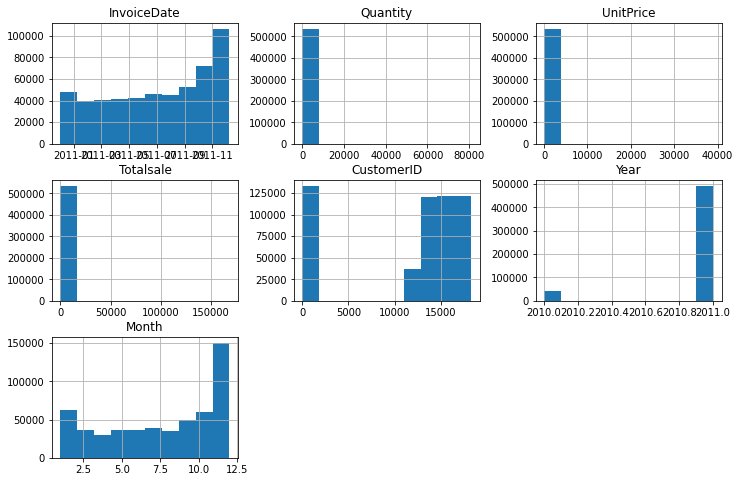

In [78]:
data.hist(figsize=(12, 8));

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

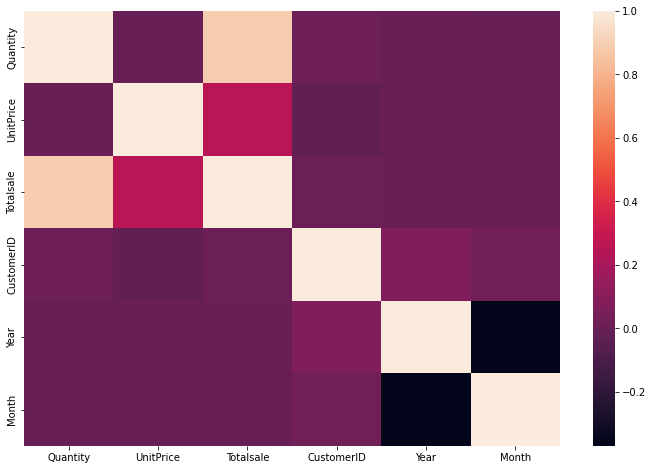

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr());

In [81]:
def number_of_unique(dataframe):
    for col in dataframe.columns:
        print("{} Column has {} number of unique values.".format(col, dataframe[col].nunique()))

In [82]:
number_of_unique(data)

InvoiceNo Column has 24446 number of unique values.
InvoiceDate Column has 305 number of unique values.
InvoiceTime Column has 774 number of unique values.
StockCode Column has 3958 number of unique values.
Description Column has 4191 number of unique values.
Quantity Column has 457 number of unique values.
UnitPrice Column has 1629 number of unique values.
Totalsale Column has 4914 number of unique values.
CustomerID Column has 4373 number of unique values.
Country Column has 38 number of unique values.
Year Column has 2 number of unique values.
Month Column has 12 number of unique values.
Season Column has 4 number of unique values.
AM_or_PM Column has 2 number of unique values.


In [83]:
def barplot_percentage(column, title="", slice=12):
    # number of rows
    total = data.shape[0]

    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.barplot(data[column].value_counts()[: slice].index, data[column].value_counts()[: slice])
    ax.set_title(title)

    # Adding percentage to the bars
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{percentage}', (x + width/2, y + height*1.02), ha='center')

    plt.ylabel("Count")
    plt.show()

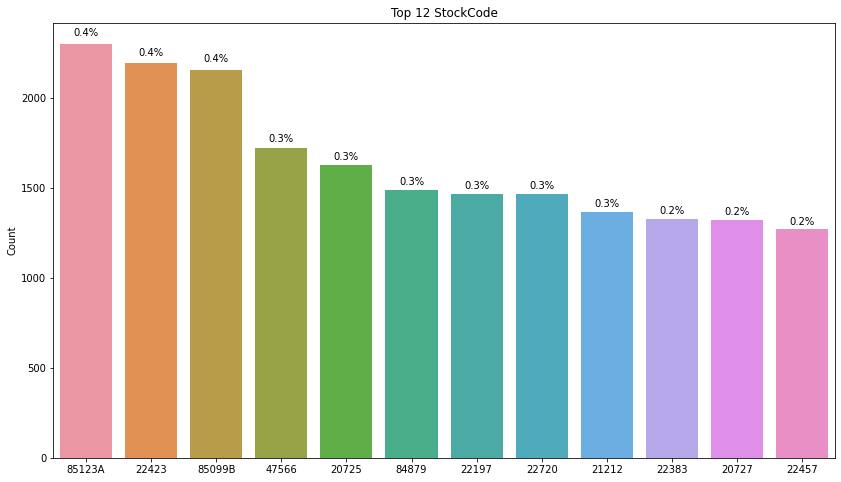

In [84]:
barplot_percentage("StockCode", "Top 12 StockCode")

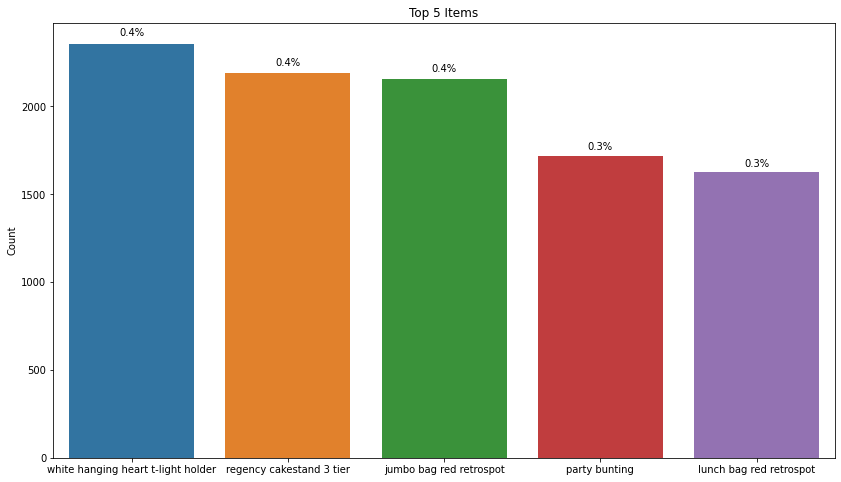

In [85]:
barplot_percentage("Description", "Top 5 Items", 5)

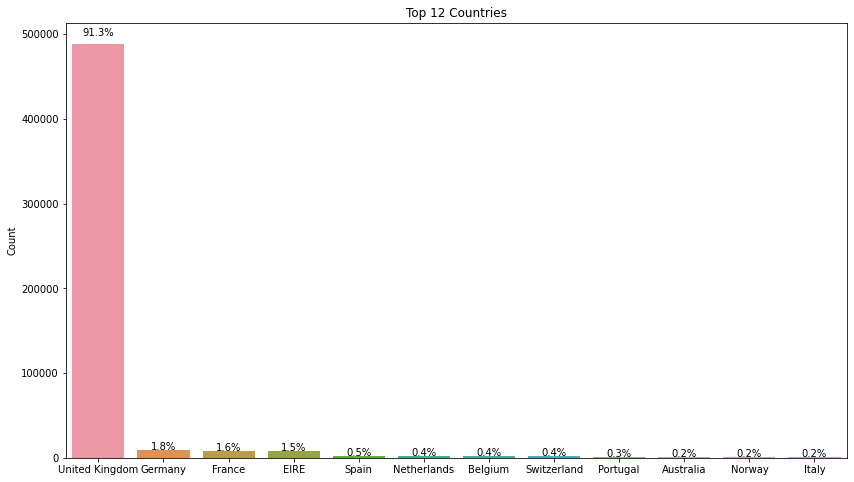

In [86]:
barplot_percentage("Country", "Top 12 Countries")

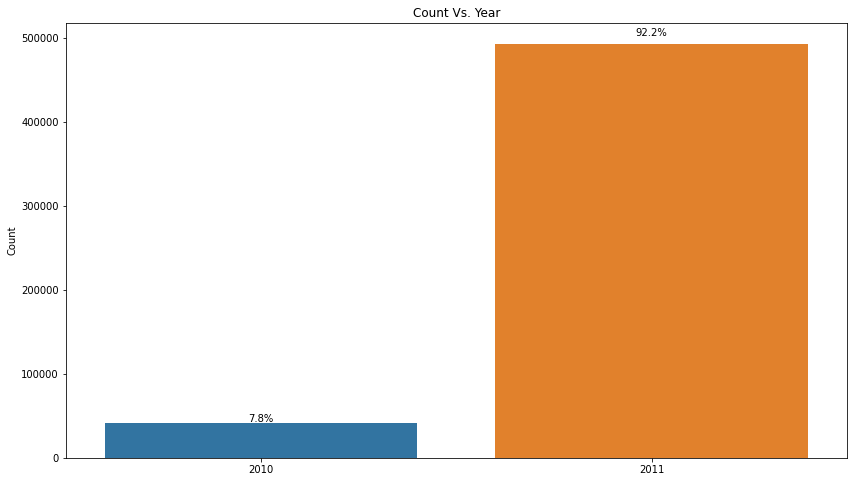

In [87]:
barplot_percentage("Year", "Count Vs. Year")

In [88]:
print("The oldest date is: {}, while the latest date is: {}".format(data.InvoiceDate.min(), data.InvoiceDate.max()))

The oldest date is: 2010-12-01 00:00:00, while the latest date is: 2011-12-09 00:00:00


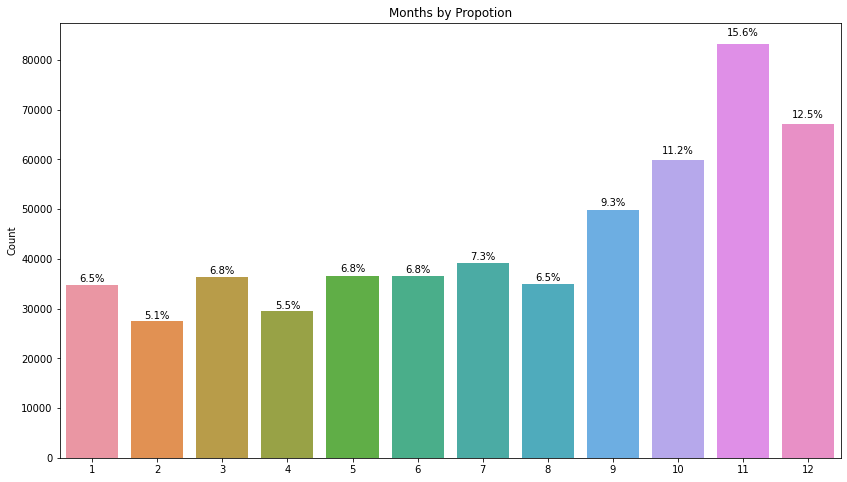

In [89]:
barplot_percentage("Month", "Months by Propotion")

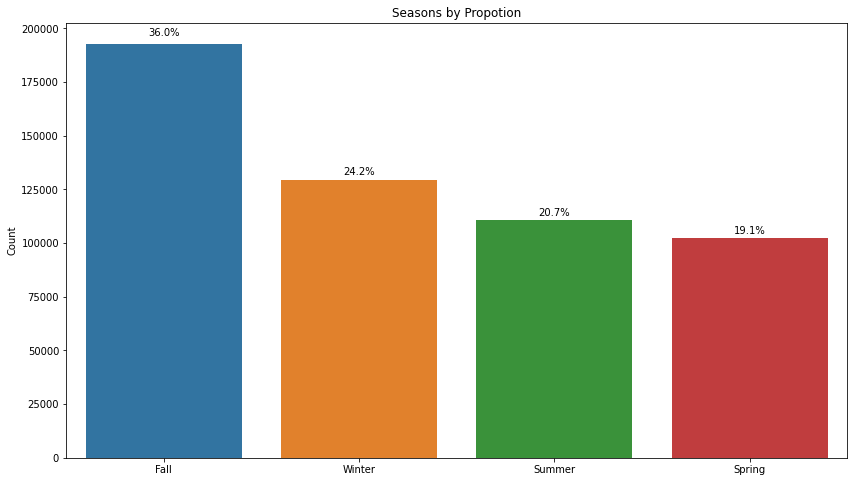

In [90]:
barplot_percentage("Season", "Seasons by Propotion")

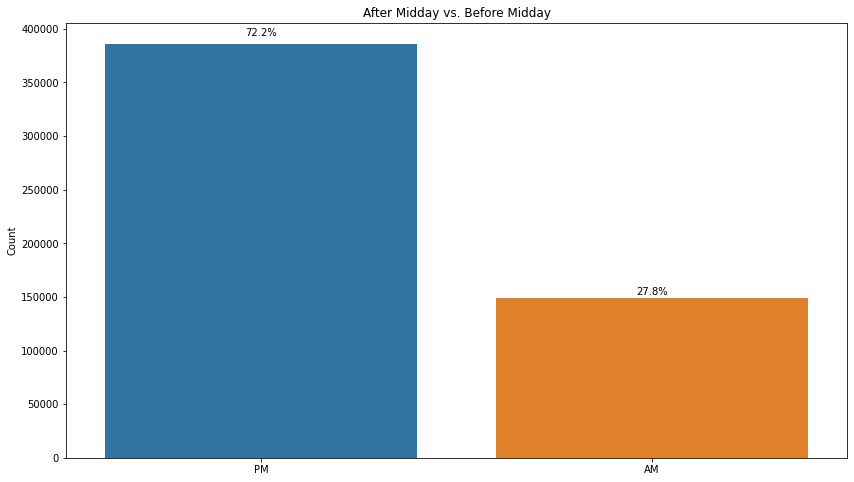

In [91]:
barplot_percentage("AM_or_PM", "After Midday vs. Before Midday")

**We can see that United Kingdom is approximately 91% of the contries in our data. Most transcations are in 2011, and just one month which is december in 2010. November, December and Octobor are the highest. Fall is the highest season, follows it Winter, Summer then Spring. 70% of invoices are made after midday "noon".**

# **FP-Algorithm**

We know there is 24k invoices and almost 4200 items, so i'm going to take a 
portion, since taking all transacations is so computationally expensive.

In [92]:
# getting 200 invoices ids
invoices_ids = data.InvoiceNo.unique()[: 200]

In [93]:
# this code just gets me unique items, so I can use them as column
# this is my method, i'm sure there is better than this

all_items = []
for val in invoices_ids:
    general_items = data[data['InvoiceNo'] == val]['Description'].unique()
    #print("val: {}".format(val), general_items)
    all_items.append(list(general_items))

from functools import reduce

flatten_list = reduce(lambda z, y :z + y, all_items) # concatenating
flatten_list = set(flatten_list) # removing duplicates
# printing flatten_list
#print (flatten_list)

In [94]:
# making a dataframe where index is the invoice id, and columns are the items we made previously
fp_growth_df = pd.DataFrame(index=invoices_ids, columns=flatten_list)
fp_growth_df.fillna(0, inplace=True)
fp_growth_df.head()

,oven mitt apples design,lunch bag black skull,"letter ""s"" bling key ring",skulls storage box small,magnets pack of 4 home sweet home,party cones carnival assorted,basket of toadstools,red star card holder,set of 2 tins jardin de provence,red retrospot tape,...,christmas lights 10 vintage baubles,doormat welcome puppies,green christmas tree card holder,blue sweetheart bracelet,3d sheet of cat stickers,polkadot mug pink,square floor cushion vintage red,home small wood letters,fairy dreams incense,empire tissue box
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# assigning 1 if this item X was in that invoice id Y
for val in invoices_ids:
    general_items = data[data['InvoiceNo'] == val]['Description'].unique()
    for item in general_items:
        fp_growth_df.loc[val][item] = 1
fp_growth_df.head()

,oven mitt apples design,lunch bag black skull,"letter ""s"" bling key ring",skulls storage box small,magnets pack of 4 home sweet home,party cones carnival assorted,basket of toadstools,red star card holder,set of 2 tins jardin de provence,red retrospot tape,...,christmas lights 10 vintage baubles,doormat welcome puppies,green christmas tree card holder,blue sweetheart bracelet,3d sheet of cat stickers,polkadot mug pink,square floor cushion vintage red,home small wood letters,fairy dreams incense,empire tissue box
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Mlxtend**

Mlxtend (machine learning extensions) is a Python library of useful tools for 
the day-to-day data science tasks.

In [96]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth

#running the fpgrowth algorithm
res = fpgrowth(fp_growth_df, min_support=0.05, use_colnames=True)

# printing top 10
res.head(10) 

/opt/conda/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.130,(white hanging heart t-light holder)
1,0.115,(red woolly hottie white heart)
2,0.095,(set 7 babushka nesting boxes)
3,0.090,(knitted union flag hot water bottle)
4,0.070,(white metal lantern)
5,0.065,(cream cupid hearts coat hanger)
6,0.065,(glass star frosted t-light holder)
7,0.120,(hand warmer union jack)
8,0.065,(hand warmer red polka dot)
9,0.055,(assorted colour bird ornament)


In [97]:
res.shape

(17924, 2)

# **Implementing association_rule module - Mlxtend**

In [98]:
# importing required module
from mlxtend.frequent_patterns import association_rules

# creating asssociation rules
res = association_rules(res, metric="lift", min_threshold=1)

# printing association rules
res 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red woolly hottie white heart),(white hanging heart t-light holder),0.115,0.130,0.08,0.695652,5.351171,0.065050,2.858571
1,(white hanging heart t-light holder),(red woolly hottie white heart),0.130,0.115,0.08,0.615385,5.351171,0.065050,2.301000
2,(red woolly hottie white heart),(set 7 babushka nesting boxes),0.115,0.095,0.06,0.521739,5.491991,0.049075,1.892273
3,(set 7 babushka nesting boxes),(red woolly hottie white heart),0.095,0.115,0.06,0.631579,5.491991,0.049075,2.402143
4,(white hanging heart t-light holder),(set 7 babushka nesting boxes),0.130,0.095,0.06,0.461538,4.858300,0.047650,1.680714
...,...,...,...,...,...,...,...,...,...
4904189,"(hand warmer owl design, hand warmer scotty do...",(hand warmer red retrospot),0.065,0.090,0.05,0.769231,8.547009,0.044150,3.943333
4904190,"(hand warmer red retrospot, hand warmer scotty...",(hand warmer owl design),0.050,0.075,0.05,1.000000,13.333333,0.046250,inf
4904191,(hand warmer owl design),"(hand warmer red retrospot, hand warmer scotty...",0.075,0.050,0.05,0.666667,13.333333,0.046250,2.850000
4904192,(hand warmer red retrospot),"(hand warmer owl design, hand warmer scotty do...",0.090,0.065,0.05,0.555556,8.547009,0.044150,2.103750


In [99]:
# Sort values based on confidence
res.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2452097,"(glass star frosted t-light holder, save the p...","(cream cupid hearts coat hanger, vintage billb...",0.05,0.05,0.05,1.000000,20.000000,0.0475,inf
3054333,"(knitted union flag hot water bottle, save the...","(wood 2 drawer cabinet white finish, wooden pi...",0.05,0.05,0.05,1.000000,20.000000,0.0475,inf
3054302,"(knitted union flag hot water bottle, vintage ...","(wooden picture frame white finish, white hang...",0.05,0.05,0.05,1.000000,20.000000,0.0475,inf
3054303,"(vintage billboard drink me mug, white hanging...","(knitted union flag hot water bottle, wooden p...",0.05,0.05,0.05,1.000000,20.000000,0.0475,inf
3054304,"(knitted union flag hot water bottle, white ha...","(wooden picture frame white finish, wood 2 dra...",0.05,0.05,0.05,1.000000,20.000000,0.0475,inf
...,...,...,...,...,...,...,...,...,...
730583,(white hanging heart t-light holder),"(red woolly hottie white heart, wood 2 drawer ...",0.13,0.05,0.05,0.384615,7.692308,0.0435,1.54375
730457,(white hanging heart t-light holder),"(red woolly hottie white heart, wood 2 drawer ...",0.13,0.05,0.05,0.384615,7.692308,0.0435,1.54375
3338667,(white hanging heart t-light holder),"(wood 2 drawer cabinet white finish, glass sta...",0.13,0.05,0.05,0.384615,7.692308,0.0435,1.54375
730331,(white hanging heart t-light holder),"(red woolly hottie white heart, wood 2 drawer ...",0.13,0.05,0.05,0.384615,7.692308,0.0435,1.54375
